<a href="https://colab.research.google.com/github/dhapitha22/Diabetic-Data-Exploration/blob/main/Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Data Analysis**

 **1.	Introduction**



---



Diabetes is a prevalent non-communicable disease globally. It is a chronic condition characterized by excessively high blood glucose levels, typically regulated by the hormone insulin, produced by the pancreas. Diabetes arises when issues occur with this hormone and its function in the human bloodstream.

The number of diabetes cases is increasing worldwide, with the International Diabetes Federation reporting over 500 million people affected as of 2022. Furthermore, it caused an estimated 6.7 million deaths by the end of 2021, with many of these deaths occurring in low and middle-income countries. Unfortunately, more than half of all diabetes cases remain undiagnosed. The World Health Organization predicts that the number of deaths will double by 2045, and diabetes can lead to numerous complications, including heart disease, kidney disease, blindness, and eye problems.

Various risk factors are associated with diabetes. In this project, as a data scientist, I have used a dataset containing case scenarios and diagnoses from Frankfurt Hospital, Germany. The goal is to create an exploratory data analysis pipeline to predict the likelihood of diabetes in a given situation.



However, diabetes is linked with a variety of risk factors. As a data scientist, I used a dataset containing a part of situations and their conclusion from the hospital Frankfurt, Germany to create an experimental data analysis workflow to forecast whether diabetes will arise or not in a given scenario.




# **2.	Data Collection**

 **2.1 Dataset**

To create the diabetes classification system, the hospital in Frankfurt, Germany provided the diabetics dataset. The data is stored in a CSV file, which stands for comma separated values. The two main features of this file are 1 and 0, which stand for "Diabetics" and "No Diabetics," respectively.

Dataset link - https://www.kaggle.com/johndasilva/diabetes


>  ***Characteristics of data***


  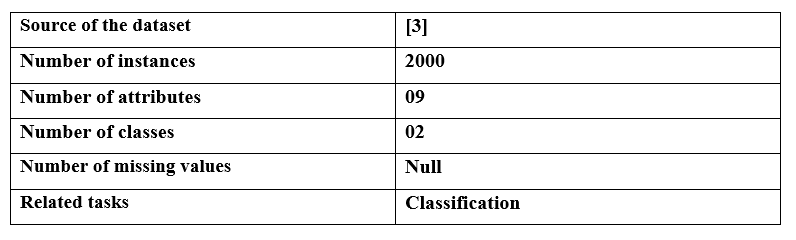


  **2.1	Description of Dataset**

The dataset consists of two groups: "Diabetes" and "No Diabetes". The various features in the dataset represent different risk factors for diabetes, which can be used to predict whether a person has diabetes or not. The "Outcome" column is the target variable that we aim to predict, with 0 indicating "No diabetes" and 1 indicating "diabetes".

***The attributes in the dataset are as follows:***

**Pregnancies**: The total number of times the patient has been pregnant (measured in number of pregnancies).

**Glucose**: The amount of glucose present in the patient's blood.

**Blood Pressure**: The patient's systolic blood pressure, expressed in millimeters of mercury (mm Hg).

**Skin Thickness**: The measurement of subcutaneous adipose tissue in the anterior abdomen, with an average thickness of 15.73 mm.

**Insulin**: The amount of insulin present in the patient's blood, measured in (mu U/ml).

**BMI**: A measure of body fat based on a person's height and weight, calculated as weight in kilograms divided by the square of the height in meters.

**Diabetes Pedigree Function**: Information on the patient's family history of diabetes mellitus and genetic ties.

**Age**: The patient's current age in years.

**Outcome**: A binary variable indicating whether the patient has diabetes or not, with 0 indicating "No diabetes" and 1 indicating "diabetes".

  


##**Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sklearn.metrics as sm
%matplotlib inline
from sklearn.model_selection import train_test_split , GridSearchCV

## **Importing the data set**

In [ ]:
data_set = pd.read_csv("dataset_diabetes.csv")

**Show the dataset**

The code below displays a part of the provided dataset



In [ ]:
#Display the data
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


##**Visualize variables using histograms**

The code below is used to generate histograms for each characteristic in the collection. A histogram can be used to visualize the spread of data for each characteristic. The result of the following code is a collection of histograms. We can see from the output that the features have distinct distribution values.


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

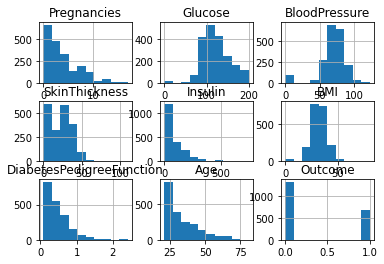

In [ ]:
data_set.hist()

# **Data Preprocessing**

There appear to be no null values (NaN) in this collection, but some zero values contradict the information in their individual sections. This is due to the fact that certain groups, such as the quantity of glucose in the patient's blood, diastolic blood pressure, epidermis thickness, insulin level in the patient's blood, BMI, and age, cannot be negative. As a result, zero numbers are deemed missing data.


Preprocessing the data is required to handle the problem of missing data. The first step is to find the zero values in each column and substitute them with null values using the Pandas DataFrame's replace() function. Then, using another Pandas method called fillna, the blank values can be replaced with the mean values of each column.().


**Display comprehensive details about each attribute.**

In [ ]:
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


**Check the existing null values**

In [ ]:
sum_of_null = sum(data_set.isnull().sum())
print(sum_of_null)

0


**Determine the amount of zeros in each column**

In [ ]:
print((data_set[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] == 0).sum())

Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


**make the zero values as NaN or missing and count those values in each column**

In [ ]:
data_set[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_set[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0, np.NaN)
print(data_set.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**fill missing values with mean column values and get the count of NaN values in each column**

In [ ]:
data_set.fillna(data_set.mean(), inplace=True)
print(data_set.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


 **The preprocessed data**

In [ ]:
#Display the data
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


# **Using Python analysis, there are business problem question relating to the diabetes dataset that are clarified**

**1. How do the patients' body mass index (BMI) values vary by diabetes status?**

Understanding the link between BMI and diabetes state can assist healthcare practitioners in creating suitable lifestyle measures and nutritional suggestions to reduce the risk of getting diabetes. Furthermore, this data can assist clinicians in predicting the potential health dangers associated with greater BMI values in diabetic patients, as well as anticipating the kinds of medical treatments that may be needed.

> group by the diabetes status and calculate average BMI.



In [ ]:
bmi_avg = data_set.groupby('Outcome')['BMI'].mean()
print(bmi_avg)

Outcome
0    31.18773
1    35.46367
Name: BMI, dtype: float64


Diabetes patients have a considerably higher BMI (35.46) than individuals without diabetes. (31.18). This indicates that having a higher BMI may put you at a higher chance of getting diabetes.

**2. Does pregnancy affect the diagnosis of diabetes?**

groupby() function  organizes the data in the data_set DataFrame according to the columns for Pregnancies and Outcome. A grouping object is produced as a result, which can be used to combine the data.

unstack(): This method converts the grouping object into a DataFrame, where the groups are converted into columns and the index is replaced with the values of the first grouping column. This generates a pivot table, which can be used to examine the data based on the second grouping column.


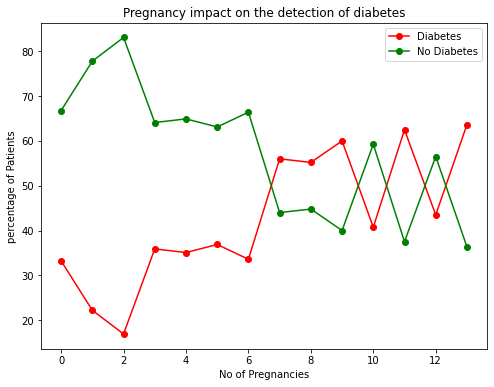

In [ ]:
diabetes_pregnancy = data_set.groupby(['Pregnancies', 'Outcome']).size().unstack()

diabetes_pregnancy['Total'] = diabetes_pregnancy[0] + diabetes_pregnancy[1]
diabetes_pregnancy['Diabetes %'] = (diabetes_pregnancy[1] / diabetes_pregnancy['Total']) * 100
diabetes_pregnancy['No Diabetes %'] = (diabetes_pregnancy[0] / diabetes_pregnancy['Total']) * 100

diabetes_pregnancy.reset_index(inplace=True)
diabetes_pregnancy.rename(columns={0: 'No Diabetes', 1: 'Diabetes'}, inplace=True)

plt.figure(figsize=(8,6))
plt.plot('Pregnancies', 'Diabetes %', data=diabetes_pregnancy, marker='o', color='red', label='Diabetes')
plt.plot('Pregnancies', 'No Diabetes %', data=diabetes_pregnancy, marker='o', color='green', label='No Diabetes')
plt.title('Pregnancy impact on the detection of diabetes')
plt.xlabel('No of Pregnancies')
plt.ylabel('percentage of Patients')
plt.legend()
plt.show()


The diabetes diagnosis values in this updated code are supposed to be 1 and 0, where 1 denotes the patient has diabetes and 0 denotes the patient does not. The code divides the data into groups based on the number of pregnancies and the diabetes outcome, computes the total number of patients for each pregnancy category, calculates the proportion of patients with diabetes and with out diabetes for each pregnancy category, and then plots a line graph to show the relationship between pregnancy and diabetes diagnosis.

The resulting graph demonstrates that while the proportion of patients with diabetes typically rises with the number of pregnancies, it eventually reaches a plateau. This implies that caring for pregnant patients may carry a small risk of diabetes, which medical professionals should be mindful of.


**3. How does the age distribution of patients with diabetes compare to the age distribution of patients without diabetes in this dataset?**

At first, create two separate datasets for patients with and without diabetes. For each dataset, a density plot is created using seaborn's kdeplot() function, with the age variable on the x-axis and the density on the y-axis. This code reads in the diabetes dataset using pandas, generates distinct datasets for patients with and without diabetes, and plots the density on the y-axis. The label argument gives each figure a name, and the shade=True argument fills in the region under the arcs.

<ipython-input-59-b3d264009a6e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabete['Age'], shade=True, color='green', label='Diabetes')
<ipython-input-59-b3d264009a6e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_diabete['Age'], shade=True, color='red', label='No Diabetes')


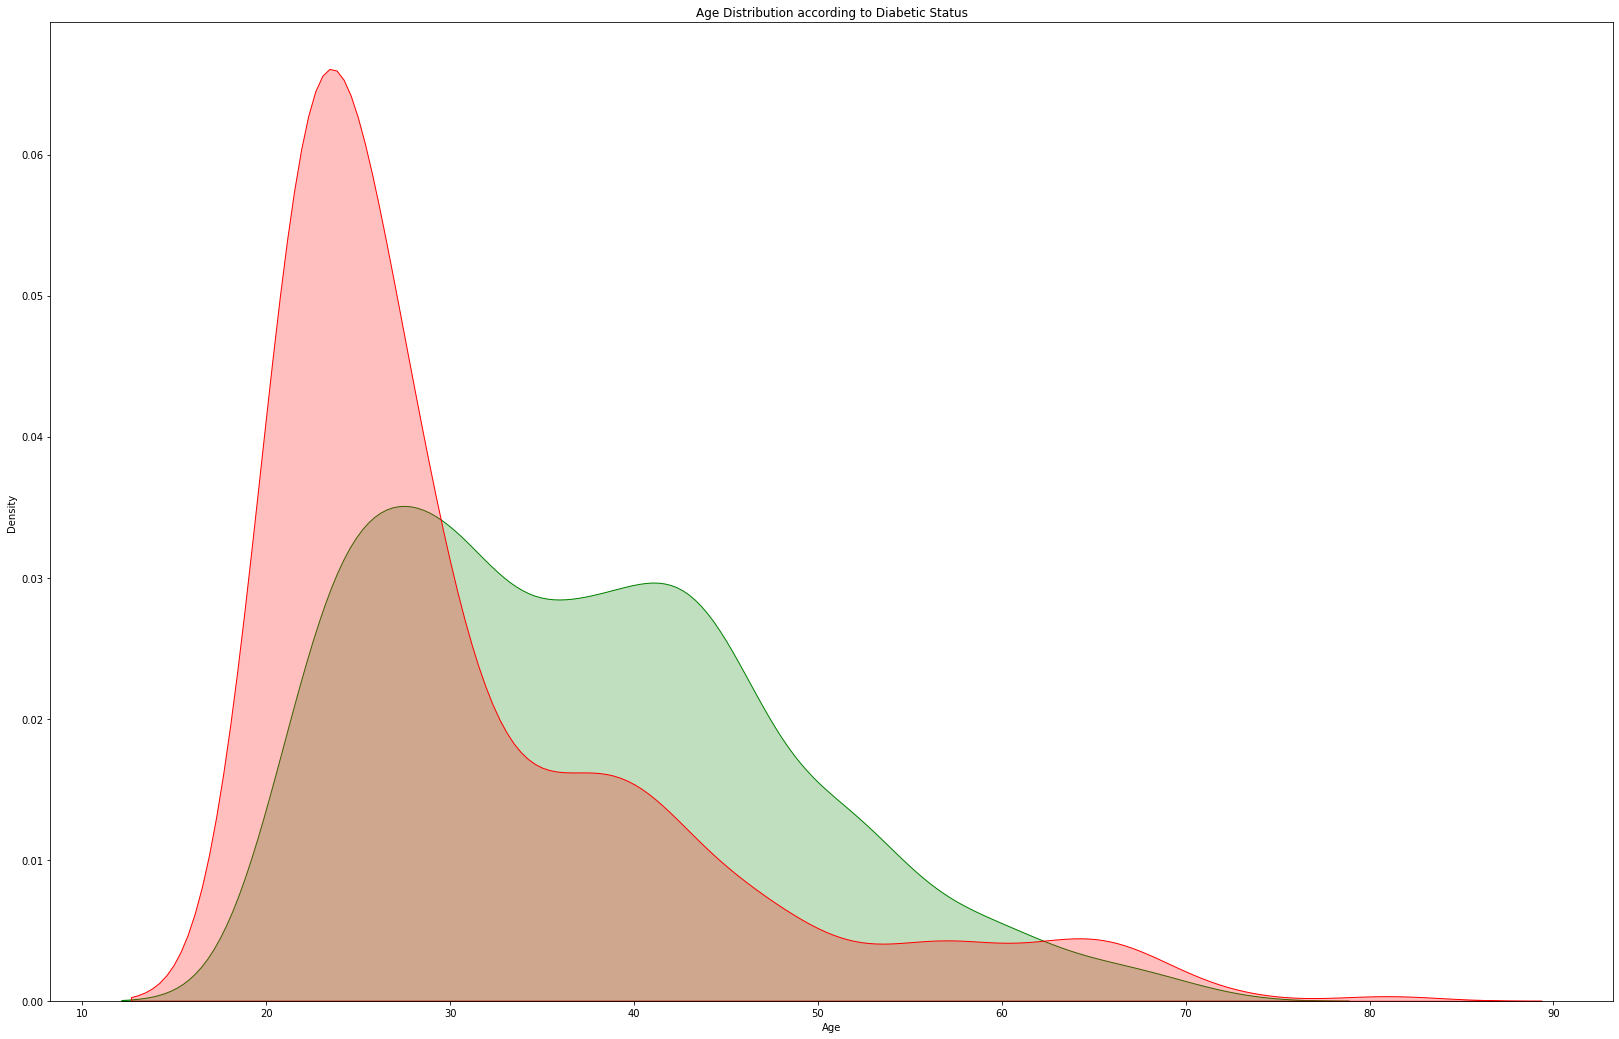

In [ ]:
diabete = data_set[data_set['Outcome'] == 1]
no_diabete = data_set[data_set['Outcome'] == 0]

# Set up the plot
sns.kdeplot(diabete['Age'], shade=True, color='green', label='Diabetes')
sns.kdeplot(no_diabete['Age'], shade=True, color='red', label='No Diabetes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution according to Diabetic Status')
plt.show()


The resulting density plot allows us to directly examine the age distributions of individuals with and without diabetes because it overlays the two distributions on the same plot. It is evident that patients with diabetes tend to be slightly older on average than patients without the disease.

**4. What is the percentage of diabetic individuals in the sample who have a family history of diabetes?**

Understanding the effect of diabetes family history can aid in finding risk factors and adopting protective measures.
To do so, we first filter the DataFrame to include only entries where the 'Outcome' value equals 1. (which indicates that the patient has diabetes). Then, using the round() function, we pick the 'DiabetesPedigreeFunction' column (which gauges the genetic risk of diabetes based on family history) and round each number to one decimal point.

Then, in the 'DiabetesPedigreeFunction' column,  use the value_counts() function to count the number of instances of each distinct rounded value. Finally, we adjust these numbers by dividing them by the total number of entries in the filtered DataFrame (via the normalize=True argument), returning the percentage of diabetic patients with a particular rounded value for the 'DiabetesPedigreeFunction.


In [ ]:
dpf = data_set[data_set['Outcome']==1]['DiabetesPedigreeFunction'].apply(lambda x: round(x, 1)).value_counts(normalize=True)
print(dpf)


0.3    0.197368
0.2    0.150585
0.4    0.118421
0.7    0.096491
0.5    0.084795
0.6    0.076023
0.1    0.055556
0.8    0.054094
0.9    0.038012
1.2    0.030702
1.0    0.026316
1.1    0.026316
1.3    0.019006
1.4    0.014620
2.1    0.004386
2.4    0.004386
1.9    0.002924
Name: DiabetesPedigreeFunction, dtype: float64


The output shows that the greatest percentage of diabetic patients with a diabetes family history is at a 'DiabetesPedigreeFunction' value of 0.3 (19.74%), followed by 0.2 (15.06%) and 0.4 (11.84%). This suggests that there is a link between a family history of diabetes (as measured by the 'DiabetesPedigreeFunction' column) and the probability of developing diabetes (as measured by the 'Outcome' column).

**5. What is the correlation between BMI and age of patients with diabetes?**

This code employs NumPy to compute the correlation coefficient between the BMI and age of diabetic individuals. We first limit the dataset to include only diabetic patients (Outcome = 1), and then pick the BMI and Age columns by their column titles. The correlation matrix between these two variables is then calculated using the np.corrcoef() method, and the correlation value is extracted using indexing.


In [ ]:
diabetes_patients = data_set[data_set['Outcome'] == 1]
correlation = np.corrcoef(diabetes_patients['BMI'], diabetes_patients['Age'])[0, 1]
print("Correlation between BMI and age of patients with diabetes: ", correlation)


Correlation between BMI and age of patients with diabetes:  -0.20042843952190217




The correlation coefficient number of -0.20042843952190217 indicates that there is a weak negative link between BMI and age of diabetes patients. This means that as diabetic patients mature, their BMI tends to decline slightly on average. The strength of this negative association, however, is weak, implying that age alone may not be a powerful predictor of BMI for diabetic individuals in this sample.



Understanding the connection between BMI and age can help patients control their diabetes, as both are significant variables that can impact diabetes management and general health outcomes. For example, when giving medicines or suggesting behavioral adjustments to control diabetes, healthcare practitioners may need to consider a patient's age and BMI. This data can also be used to identify subsets of diabetic patients who may require more focused treatments or extra assistance to control their condition.


**6. What is the average glucose level of patients with and without diabetes?**

The mean glucose level of individuals with and without diabetes is calculated using NumPy and Pandas in this code. We select the dataset based on the outcome value (1 for diabetes, 0 for no diabetes) and compute the average glucose level for each group using the.mean() method.

In [ ]:
avg_glucose_diabetes = data_set[data_set['Outcome'] == 1]['Glucose'].mean()
avg_glucose_no_diabetes = data_set[data_set['Outcome'] == 0]['Glucose'].mean()
print("Average glucose level for patients with diabetes: ", avg_glucose_diabetes)
print("Average glucose level for patients without diabetes: ", avg_glucose_no_diabetes)


Average glucose level for patients with diabetes:  142.63867257053892
Average glucose level for patients without diabetes:  111.23543113826497



on average, patients with diabetes have a higher glucose level compared to those without diabetes. Can use this data to set objective glucose values for diabetic patients and track their progress toward meeting these goals. Furthermore, based on their glucose levels, this information can assist in identifying people who are at a greater risk of getting diabetes and taking preventive steps to lower this risk.

**7. Find the median age for patients with and without diabetes who have had higher pregnancies?**

Create a new DataFrame called higher_preg by filtering the original DataFrame to select only the rows where the Pregnancies column is greater than 5. then Extract the 'Age' column from the filtered DataFrame using the to_numpy() method,for patients with and without diabetes. Calculate the median age using the  median() function for patients with and without diabetes

In [ ]:
higher_preg = data_set[data_set['Pregnancies'] == 5]

diabetes_array = higher_preg[higher_preg['Outcome'] == 1]['Age'].to_numpy()
undiabetes_array = higher_preg[higher_preg['Outcome'] == 0]['Age'].to_numpy()

avg_age_diabetes = np.median(diabetes_array)
avg_age_undiabetes = np.median(undiabetes_array)

print('The average age of diabetes individuals with higher pregnancies is :', avg_age_diabetes)
print('The average age of undiabetes individuals with higher pregnancies is:', avg_age_undiabetes)


The average age of diabetes individuals with higher pregnancies is : 37.0
The average age of undiabetes individuals with higher pregnancies is: 34.0


Individuals with diabetes and higher conceptions have an average age of 37.0, while those without diabetes and higher pregnancies have an average age of 34.0.

This knowledge could be helpful in understanding how diabetes affects the age at which people become pregnant. However, it is important to note that this knowledge does not teach us anything about the causal link between diabetes and increased pregnancies.


In [ ]:
!jupyter nbconvert --to html Diabetes_dataset_A504.ipynb

[NbConvertApp] Converting notebook Diabetes_dataset_A504.ipynb to html
[NbConvertApp] Writing 926159 bytes to Diabetes_dataset_A504.html
